In [1]:
import os
import math

import scipy as sp
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster
from sklearn import neighbors

import torch
import torch.nn as nn
import torch.optim as optim

import scikit_wrappers

In [2]:
cuda = False
if torch.cuda.is_available():
    print("Using CUDA...")
    cuda = True

# GPU number
gpu = 0

Using CUDA...


### Dataset

In [3]:
ds = pd.read_csv("Data/owid-covid-data.csv")

In [4]:
#Except France, China, USA, Nepal
contries  =['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL',  'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM',
        'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MNP', 'NOR',
       'OMN', 'PAK', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'KNA', 'LCA', 'VCT',
       'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM',
       'SVK', 'SVN', 'SOM', 'ZAF', 'KOR', 'SSD', 'ESP', 'LKA', 'SDN',
       'SUR', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA',
       'TLS', 'TGO', 'TTO', 'TUN', 'TUR', 'TCA', 'UGA', 'UKR', 'ARE',
       'GBR',  'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH',
       'YEM', 'ZMB', 'ZWE']

In [5]:
data = ds[ds['iso_code'].isin(contries)]['new_cases']
#ds[ds['iso_code'] in contries]['new_cases'].reset_index().drop(columns=['index']).plot()

In [6]:
data = data.interpolate(method='nearest')

In [ ]:
#train, test = sklearn.model_selection.train_test_split(data.to_numpy(), test_size=0.2, shuffle=False)

In [7]:
# Preprocessing: normalization
mean = np.mean(data)
var = np.var(data)

data = (data - mean)/math.sqrt(var)
#train = (train - mean)/math.sqrt(var)
#test = (test - mean)/math.sqrt(var)

print('Mean: ', np.mean(data))
print('Variance: ', np.var(data))

Mean:  -5.724556898291298e-18
Variance:  1.0000000000000004


### Meat

In [8]:
hyperparameters = {
    "batch_size": 1,
    "channels": 30,
    "compared_length": None,
    "depth": 10,
    "nb_steps": 100,
    "in_channels": 1,
    "kernel_size": 3,
    "penalty": None,
    "early_stopping": None,
    "lr": 0.001,
    "nb_random_samples": 10,
    "negative_penalty": 1,
    "out_channels": 160,
    "reduced_size": 80,
    "cuda": cuda,
    "gpu": gpu
}

In [9]:
encoder = scikit_wrappers.CausalCNNEncoderClassifier()
encoder.set_params(**hyperparameters)

CausalCNNEncoderClassifier(batch_size=1, channels=30, compared_length=inf,
                           cuda=True, depth=10, early_stopping=None, gpu=0,
                           in_channels=1, kernel_size=3, lr=0.001,
                           nb_random_samples=10, nb_steps=100,
                           negative_penalty=1, out_channels=160, penalty=None,
                           reduced_size=80)

In [10]:
model = 'COVIDMODELS/'

In [11]:
data = np.array([[data.to_numpy()]])

In [13]:
#encoder.fit_encoder(data, save_memory=True, verbose=True)
encoder.load_encoder(model)

In [15]:
#encoder.save_encoder(model)

In [14]:
test_fra = np.array([[ds[ds['iso_code'].isin(['FRA'])]['new_cases'].to_numpy()]])
test_chn = np.array([[ds[ds['iso_code'].isin(['CHN'])]['new_cases'].to_numpy()]])
test_usa = np.array([[ds[ds['iso_code'].isin(['USA'])]['new_cases'].to_numpy()]])
test_npl = np.array([[ds[ds['iso_code'].isin(['NPL'])]['new_cases'].interpolate(method='nearest').to_numpy()]])

In [15]:
test_features_fra = encoder.encode_window(test_fra, 1)
test_features_chn = encoder.encode_window(test_chn, 1)
test_features_usa = encoder.encode_window(test_usa, 1)
test_features_npl = encoder.encode_window(test_npl, 1)

In [16]:
def find_contiguous_colors(colors):
    # finds the continuous segments of colors and returns those segments
    segs = []
    curr_seg = []
    prev_color = ''
    for c in colors:
        if c == prev_color or prev_color == '':
            curr_seg.append(c)
        else:
            segs.append(curr_seg)
            curr_seg = []
            curr_seg.append(c)
        prev_color = c
    segs.append(curr_seg) # the final one
    return segs

### Results Visualization

In [30]:
kmeans = cluster.KMeans(n_clusters=3).fit(np.swapaxes(test_features_npl[0, :, :], 0, 1))

In [31]:
associated_colors = {0: 'blue', 1: 'green', 2: 'red', 3: 'yellow', 4: 'magenta', 5: 'black', 6: 'purple', 7: 'cyan', 8: 'pink', 9: 'orange', 10: 'grey', 11: 'fuchsia', 12: 'maroon', 13: 'navy'}
colors = [associated_colors[l] for l in kmeans.labels_]
segments = find_contiguous_colors(colors)

In [19]:
plt.figure(figsize=(30,10))

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

In [32]:
flat_seg = [item for sublist in segments for item in sublist]

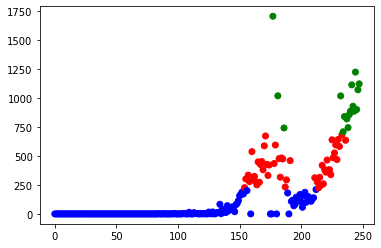

In [33]:
y = range(0,len(flat_seg))

plt.scatter(y,test_npl,color=flat_seg)

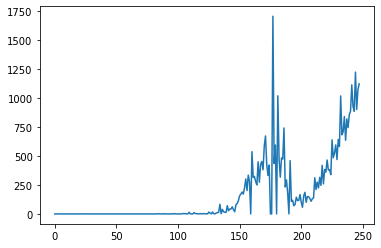

In [44]:
plt.plot(test_npl.flatten())